1. function that has maximum decay infinitely

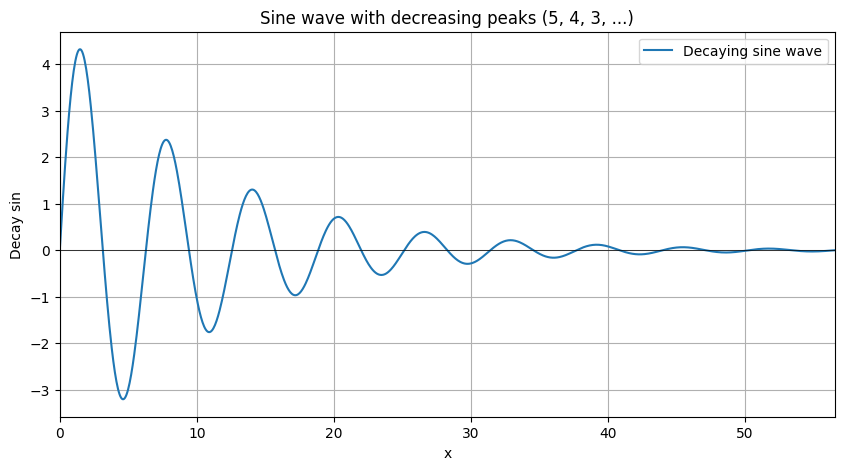

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create x values from 0 to 6π (enough to see several peaks)
end_x = 18*np.pi
x = np.linspace(0, end_x, 1000)

# Create a decaying sine function where each peak is reduced by 1
# We'll use floor division to count complete periods and subtract accordingly
def decaying_sine(x):
    period = 2*np.pi  # Full period of sine function
    # n = (x // period).astype(int)  # Count complete periods
    decay_factor = 1.1**(-x)
    return 5*decay_factor * np.sin(x)

y = decaying_sine(x)

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Decaying sine wave')
plt.title('Sine wave with decreasing peaks (5, 4, 3, ...)')
plt.xlim(0,end_x)
plt.xlabel('x')
plt.ylabel('Decay sin')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)  # Add x-axis
plt.legend()
plt.show()

2. function that has finite peak 

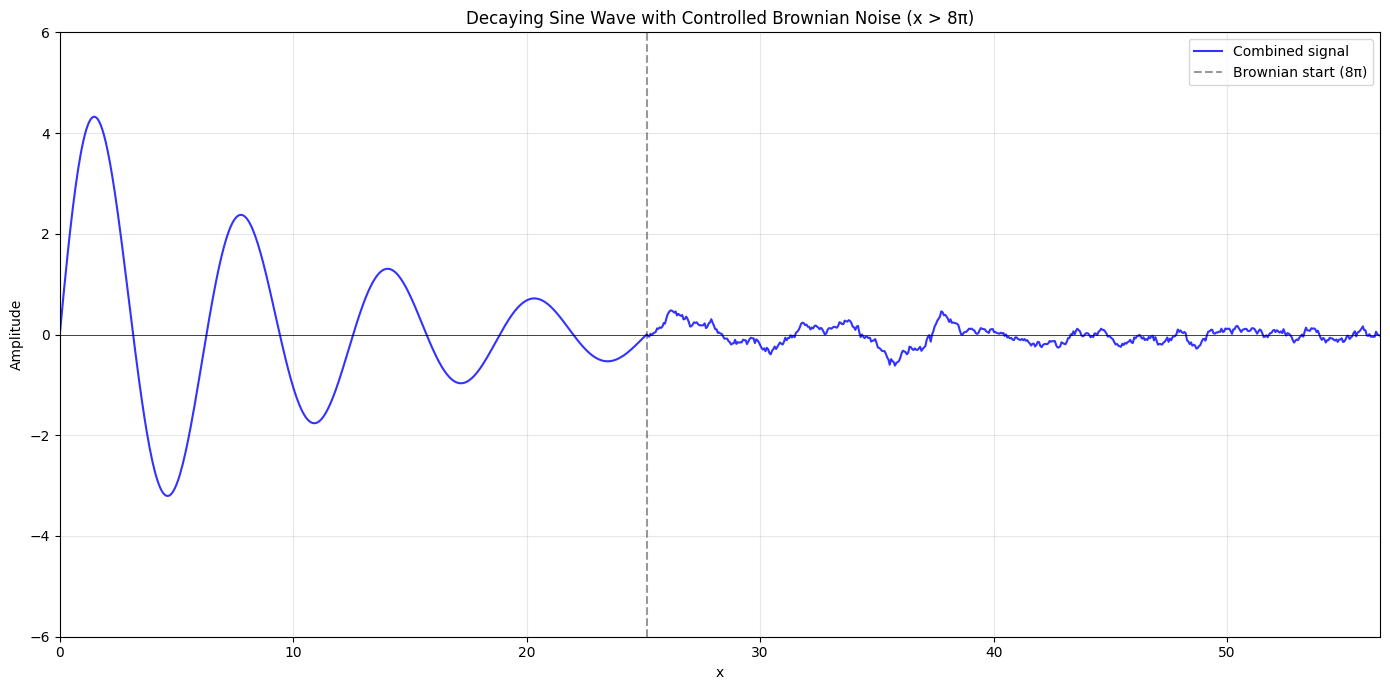

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
end_x = 18 * np.pi
n_points = 1000

# Create x values
x = np.linspace(0, end_x, n_points)

# Create decaying sine function
def decaying_sine(x):
    decay_factor = 1.1**(-x)
    return 5 * decay_factor * np.sin(x)

# Generate controlled Brownian motion only for x > 8π
def selective_brownian(x, scale=1, smoothing=10):
    bm = np.zeros_like(x)
    start_idx = np.argmax(x > 8*np.pi)
    
    # Generate random noise
    noise = np.random.normal(0, scale, len(x) - start_idx)
    
    # Smooth the noise to prevent sharp jumps
    if smoothing > 1:
        kernel = np.ones(smoothing)/smoothing
        noise = np.convolve(noise, kernel, mode='same')
    
    # Apply to the signal
    bm[start_idx:] = noise
    
    return bm

# Create the signals
y_sine = decaying_sine(x)
y_brownian = selective_brownian(x, scale=0.5, smoothing=15)  # Adjusted parameters
y_combined = y_sine + y_brownian

# Plot all components
plt.figure(figsize=(14, 7))

# Combined signal
plt.plot(x, y_combined, 'b-', alpha=0.8, label='Combined signal')

# Add transition markers
plt.axvline(8*np.pi, color='k', linestyle='--', alpha=0.4, label='Brownian start (8π)')
plt.axhline(0, color='black', linewidth=0.5)

# Formatting
plt.title('Decaying Sine Wave with Controlled Brownian Noise (x > 8π)')
plt.xlim(0, end_x)
plt.ylim(-6, 6)  # Fixed y-axis to better show effects
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

3. monotone function has infinite discontinuous points but integrable.

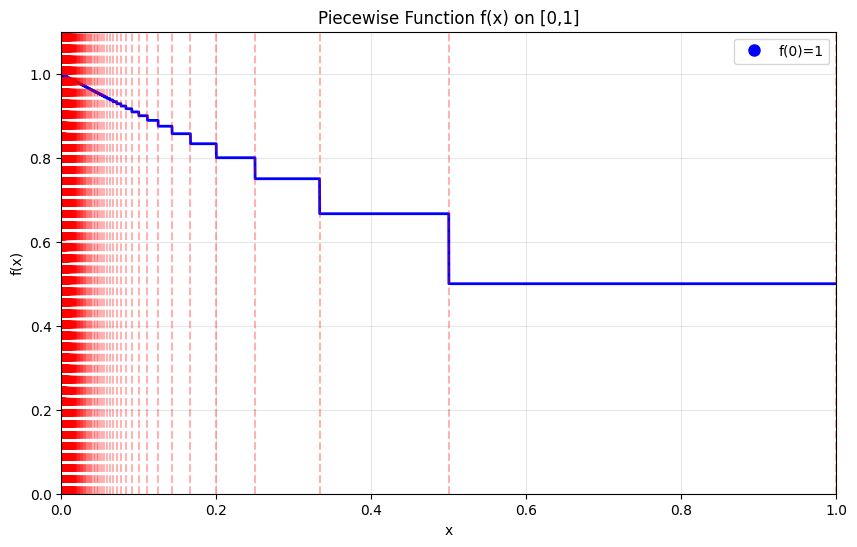

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if x == 0:
        return 1
    for n in range(1, 1000):  # Large enough to cover n for x in (0,1]
        if 1/(n+1) < x <= 1/n:
            return 1 - 1/(n+1)
    return np.nan  # fallback (shouldn't be reached for x in [0,1])

# Generate x values
x_values = np.linspace(0, 1, 10000)
y_values = np.array([f(x) for x in x_values])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'b-', linewidth=2)

# Mark the point at x=0
plt.plot(0, f(0), 'bo', markersize=8, label='f(0)=1')

# Add vertical lines at discontinuities for clarity
for n in range(1, 1000):  # Just showing first few discontinuities
    x_discontinuity = 1/n
    plt.axvline(x=x_discontinuity, color='r', linestyle='--', alpha=0.3)

# Labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Piecewise Function f(x) on [0,1]')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1.1)

plt.show()